In [ ]:
!git clone https://github.com/GabriFarace/KyaEdge-Time-Series-Model.git

Cloning into 'KyaEdge-Time-Series-Model'...


In [ ]:
!ls KyaEdge-Time-Series-Model/

"ls" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [ ]:
!python -m pip install prophet mlflow neuralprophet

In [ ]:
import sys
sys.path.append('/content/KyaEdge-Time-Series-Model')



In [ ]:
# CHANGE NAME INTO kyaedge_time_series_model
import os

# Current folder path
old_folder_path = "KyaEdge-Time-Series-Model"

# New folder path
new_folder_path = "kyaedge_time_series_model"

# Rename the folder
os.rename(old_folder_path, new_folder_path)

print(f"Folder renamed to: {new_folder_path}")


Folder renamed to: kyaedge_time_series_model


#Prophet Experiments with different asset categories and various predefined patterns

##Imports and initial settings

In [ ]:
cities_data = [
    {
        "name": "Milano",
        "lat": 45.465422,
        "lon": 9.185924,
        "flood_hazard": 2,
        "landslide_hazard": 1,
        "climatic_hazard": 2,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 335
    },
    {
        "name": "Torino",
        "lat": 45.070312,
        "lon": 7.686857,
        "flood_hazard": 2,
        "landslide_hazard": 4,
        "climatic_hazard": 3,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 335
    },
    {
        "name": "Genova",
        "lat": 44.407145,
        "lon": 8.934738,
        "flood_hazard": 1,
        "landslide_hazard": 1,
        "climatic_hazard": 1,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 335
    },
    {
        "name": "Venezia",
        "lat": 45.440847,
        "lon": 12.315515,
        "flood_hazard": 4,
        "landslide_hazard": 1,
        "climatic_hazard": 4,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 335
    },
    {
        "name": "Trento",
        "lat": 46.074779,
        "lon": 11.121749,
        "flood_hazard": 1,
        "landslide_hazard": 4,
        "climatic_hazard": 2,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 335
    },
    {
        "name": "Bologna",
        "lat": 44.494887,
        "lon": 11.342616,
        "flood_hazard": 4,
        "landslide_hazard": 3,
        "climatic_hazard": 2,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 335
    },
    {
        "name": "Roma",
        "lat": 41.902783,
        "lon": 12.496365,
        "flood_hazard": 2,
        "landslide_hazard": 3,
        "climatic_hazard": 2,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 360
    },
    {
        "name": "Firenze",
        "lat": 43.76956,
        "lon": 11.255814,
        "flood_hazard": 3,
        "landslide_hazard": 4,
        "climatic_hazard": 2,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 399
    },
    {
        "name": "Napoli",
        "lat": 40.851775,
        "lon": 14.268124,
        "flood_hazard": 1,
        "landslide_hazard": 4,
        "climatic_hazard": 2,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 360
    },
    {
        "name": "Cosenza",
        "lat": 39.298263,
        "lon": 16.253736,
        "flood_hazard": 2,
        "landslide_hazard": 3,
        "climatic_hazard": 2,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 411
    },
    {
        "name": "Catania",
        "lat": 37.507877,
        "lon": 15.08303,
        "flood_hazard": 2,
        "landslide_hazard": 3,
        "climatic_hazard": 1,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 360
    },
    {
        "name": "Palermo",
        "lat": 38.115688,
        "lon": 13.361267,
        "flood_hazard": 1,
        "landslide_hazard": 3,
        "climatic_hazard": 1,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 360
    },
    {
        "name": "Bari",
        "lat": 41.117143,
        "lon": 16.871871,
        "flood_hazard": 1,
        "landslide_hazard": 1,
        "climatic_hazard": 1,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 411
    },
    {
        "name": "Pescara",
        "lat": 42.46179,
        "lon": 14.21609,
        "flood_hazard": 2,
        "landslide_hazard": 4,
        "climatic_hazard": 2,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 360
    },
    {
        "name": "Ancona",
        "lat": 43.61583,
        "lon": 13.518915,
        "flood_hazard": 1,
        "landslide_hazard": 3,
        "climatic_hazard": 2,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 399
    },
    {
        "name": "Aosta",
        "lat": 45.734955,
        "lon": 7.313076,
        "flood_hazard": 1,
        "landslide_hazard": 1,
        "climatic_hazard": 4,
        "seismic_hazard": 3,
        "carbon_intensity_gCO2eq_kWh": 335
    }
]

In [ ]:
categories = [
    {
        "id": "23181502",
        "name": "Food Preparation Machinery - Milling Machinery",
        "cost": 50000,
        "useful_life_years": 10,
        "useful_life_hours": 20000,
        "power_kw": 10,
        "residual_value": 5000
    },
    {
        "id": "23152901",
        "name": "Packaging Machinery - Wrapping Machinery",
        "cost": 80000,
        "useful_life_years": 12,
        "useful_life_hours": 18000,
        "power_kw": 5,
        "residual_value": 8000
    },
    {
        "id": "22101524",
        "name": "Earth Moving Machinery - Mobile Excavators",
        "cost": 150000,
        "useful_life_years": 8,
        "useful_life_hours": 12000,
        "power_kw": 150,
        "residual_value": 20000
    },
    {
        "id": "23181501",
        "name": "Food Preparation Machinery - Filling Machinery",
        "cost": 100000,
        "useful_life_years": 10,
        "useful_life_hours": 15000,
        "power_kw": 7,
        "residual_value": 10000
    },
    {
        "id": "23181700",
        "name": "Food Cooking And Smoking Machinery",
        "cost": 120000,
        "useful_life_years": 12,
        "useful_life_hours": 16000,
        "power_kw": 15,
        "residual_value": 12000
    },
    {
        "id": "23241401",
        "name": "Metal Grinding Machines - Bench Grinder",
        "cost": 2000,
        "useful_life_years": 8,
        "useful_life_hours": 10000,
        "power_kw": 1,
        "residual_value": 200
    },
    {
        "id": "22101632",
        "name": "Paving Equipment - Paint Stripping Machine",
        "cost": 10000,
        "useful_life_years": 8,
        "useful_life_hours": 5000,
        "power_kw": 2,
        "residual_value": 1000
    },
    {
        "id": "23191101",
        "name": "Continuous Mixers - Single Screw Mixers",
        "cost": 30000,
        "useful_life_years": 10,
        "useful_life_hours": 12000,
        "power_kw": 5,
        "residual_value": 3000
    },
    {
        "id": "20102100",
        "name": "Mining And Quarrying Machinery And Equipment - Rock Drills",
        "cost": 50000,
        "useful_life_years": 7,
        "useful_life_hours": 10000,
        "power_kw": 20,
        "residual_value": 5000
    },
    {
        "id": "23151900",
        "name": "Paper Making And Paper Processing Machinery And Equipment",
        "cost": 250000,
        "useful_life_years": 15,
        "useful_life_hours": 25000,
        "power_kw": 50,
        "residual_value": 25000
    }
]

def get_category_by_id(category_id):
    for category in categories:
        if category["id"] == category_id:
            return category
    return None

Set Up logging and create generator sith standard configurations

In [ ]:
import kyaedge_time_series_model.time_series_generation
import logging

# Configure logging for the notebook
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    force=True
)

# Adjust module-specific logging level if needed
logging.getLogger('GeneratorLogger').setLevel(logging.INFO)

In [ ]:
import mlflow
import time
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000/")

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from kyaedge_time_series_model.time_series_generation.pattern_style.tsg_conditions import *
from kyaedge_time_series_model.sintethic_data_generation.asset_data_generation import *
from kyaedge_time_series_model.sintethic_data_generation.utils import days_between_month, days_between_dates
from kyaedge_time_series_model.sintethic_data_generation import *

telemetry_data_generator = TimeSeriesGeneratorConditions()
asset_data_generator = AssetDataGenerator(cities_data, categories)

Utility Functions

In [ ]:
def compute_rmse(forecast, true):
  return np.sqrt(np.mean((forecast - true)**2))

def compute_mae(forecast, true):
  return np.mean(np.abs(forecast - true))


In [ ]:
def create_prophet_dataframe(time_series, start_date=None):
  """
  Converts a time series to a DataFrame compatible with Prophet.

  Parameters:
  - time_series (list or pd.Series): A time series of numeric values to forecast.
  - start_date (str, optional): The starting date for the time series in 'YYYY-MM-DD' format.
    If not provided, it defaults to tomorrow's date.

  Returns:
  - pd.DataFrame: A DataFrame with columns 'ds' (datestamp) and 'y' (values),
    formatted for Prophet.
  """
  # Default start_date to tomorrow if not provided
  if start_date is None:
      start_date = (pd.Timestamp.today() + pd.Timedelta(days=1)).strftime('%Y-%m-%d')

  # Ensure time_series is a pandas Series for easier handling
  if not isinstance(time_series, pd.Series):
      time_series = pd.Series(time_series)

  # Generate date range starting from the start_date
  date_range = pd.date_range(start=start_date, periods=len(time_series), freq='D')

  # Create the DataFrame for Prophet
  prophet_df = pd.DataFrame({
      'ds': date_range,
      'y': time_series.values
  })

  return prophet_df

##Fixed Seasonalities

In [ ]:
# Create a new MLflow experiment
mlflow.set_experiment(experiment_name="Prophet for different asset telemetry patterns")

2025/01/17 12:28:03 INFO mlflow.tracking.fluent: Experiment with name 'Prophet for different asset telemetry patterns' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/422088914466224855', creation_time=1737113283670, experiment_id='422088914466224855', last_update_time=1737113283670, lifecycle_stage='active', name='Prophet for different asset telemetry patterns', tags={}>

###Initial Example

####Time series creation

baseline

In [ ]:
asset_data = asset_data_generator.generate_new_asset()
today = pd.Timestamp.today().strftime('%Y-%m-%d')

# Get baseline data
num_units = 365 * asset_data["category_data"]["useful_life_years"]
baseline_value = int(asset_data["category_data"]["useful_life_hours"] / num_units)
max_value = 24
sum_value = asset_data["category_data"]["useful_life_hours"]
print(f"ASSET CATEGORY : {asset_data["category_data"]["name"]}, BASELINE VALUE: {baseline_value}, SUM VALUE: {sum_value}")

start_date = "2023-01-01"
years = int(np.random.choice(np.arange(3, 5)))
contract_months = years * 12
num_units = days_between_month(start_date, contract_months)
noise_ratio_std = 0.1
print(f"START DATE: {start_date}, NUMBER OF DAYS: {num_units}, NOISE RATIO STD: {noise_ratio_std}")

telemetry_data_generator.reset()

# Build the baseline
telemetry_data_generator.build_baseline(num_units=num_units, baseline_value=baseline_value, min_value=0., max_value=max_value, sum_value=sum_value ,noise_ratio_std=noise_ratio_std, start_date=start_date)


ASSET CATEGORY : Earth Moving Machinery - Mobile Excavators, BASELINE VALUE: 4, SUM VALUE: 12000
START DATE: 2023-01-01, NUMBER OF DAYS: 1096, NOISE RATIO STD: 0.1


ADDING SEASONALITIES

In [ ]:
conditions = {}
multiply_value = 0.5
add_value = baseline_value * np.random.uniform(-0.5, 0.5)
setting_value = 0
conditions["true_weekly"] = f"PATTERNS LIST = [ "
conditions["true_monthly"] = f"PATTERNS LIST = [ "
conditions["true_yearly"] = f"PATTERNS LIST = [ "


In [ ]:
add_value

0.3957877906627436

#####Add conditions

weekly

In [ ]:
selected_conditions = [Weekday.SUNDAY]
start_d = None #"2025-01-01"
end_d = None #"2028-01-01"
for selected_condition in selected_conditions:
  telemetry_data_generator.apply_func_condition(condition=selected_condition, func=lambda x: x + add_value, start_date=start_d, end_date=end_d)
  conditions["true_weekly"] += f"CONDITION : {selected_condition.value} - EFFECT : add {add_value} , "

monthly

In [ ]:
selected_conditions = range(1,7)
start_d = None #"2025-01-01"
end_d = None #"2028-01-01"
for selected_condition in selected_conditions:
  telemetry_data_generator.apply_func_condition(condition=selected_condition, func=lambda x: x + add_value, start_date=start_d, end_date=end_d)
  conditions["true_monthly"] += f"CONDITION : {selected_condition} - EFFECT : add {add_value} , "

yearly

In [ ]:
selected_conditions = [("2020-12-01","2020-12-12"), ("2020-04-01","2020-04-20")]
start_d = None #"2025-01-01"
end_d = None #"2028-01-01"
for selected_condition in selected_conditions:
  telemetry_data_generator.apply_func_condition(condition=selected_condition, func=lambda x: x + add_value, start_date=start_d, end_date=end_d)
  conditions["true_yearly"] += f"CONDITION : [{selected_condition[0][5:]}, {selected_condition[1][5:]}] - EFFECT : add {add_value} , "

#####Multiply conditions

weekly

In [ ]:
selected_conditions = [Weekday.SATURDAY]
start_d = None #"2025-01-01"
end_d = None #"2028-01-01"
for selected_condition in selected_conditions:
  telemetry_data_generator.apply_func_condition(condition=selected_condition, func=lambda x: x * multiply_value, start_date=start_d, end_date=end_d)
  conditions["true_weekly"] += f"CONDITION : {selected_condition.value} - EFFECT : multiply by {multiply_value} , "

monthly

In [ ]:
selected_conditions = range(15,20)
start_d = None #"2025-01-01"
end_d = None #"2028-01-01"
for selected_condition in selected_conditions:
  telemetry_data_generator.apply_func_condition(condition=selected_condition, func=lambda x: x * multiply_value, start_date=start_d, end_date=end_d)
  conditions["true_monthly"] += f"CONDITION : {selected_condition} - EFFECT : multiply by {multiply_value} , "

yearly

In [ ]:
selected_conditions = [("2020-07-01","2020-09-01")]
start_d = None #"2025-01-01"
end_d = None #"2028-01-01"
for selected_condition in selected_conditions:
  telemetry_data_generator.apply_func_condition(condition=selected_condition, func=lambda x: x * multiply_value, start_date=start_d, end_date=end_d)
  conditions["true_yearly"] += f"CONDITION : [{selected_condition[0][5:]}, {selected_condition[1][5:]}] - EFFECT : multiply by {multiply_value} , "

#####Zero conditions

weekly

In [ ]:
selected_conditions = [Weekday.SUNDAY]
start_d = None #"2025-01-01"
end_d = None #"2028-01-01"
for selected_condition in selected_conditions:
  telemetry_data_generator.apply_func_condition(condition=selected_condition, func=lambda x: setting_value, start_date=start_d, end_date=end_d)
  conditions["true_weekly"] += f"CONDITION : {selected_condition.value} - EFFECT : set to {setting_value} , "

monthly

In [ ]:
selected_conditions = [1]
start_d = None #"2025-01-01"
end_d = None #"2028-01-01"
for selected_condition in selected_conditions:
  telemetry_data_generator.apply_func_condition(condition=selected_condition, func=lambda x: setting_value, start_date=start_d, end_date=end_d)
  conditions["true_monthly"] += f"CONDITION : {selected_condition} - EFFECT : set to {setting_value} , "

yearly

In [ ]:
selected_conditions = [("2020-12-24","2020-12-31")]
start_d = None #"2025-01-01"
end_d = None #"2028-01-01"
for selected_condition in selected_conditions:
  telemetry_data_generator.apply_func_condition(condition=selected_condition, func=lambda x: setting_value, start_date=start_d, end_date=end_d)
  conditions["true_yearly"] += f"CONDITION : [{selected_condition[0][5:]}, {selected_condition[1][5:]}] - EFFECT : set to {setting_value} , "

plotting

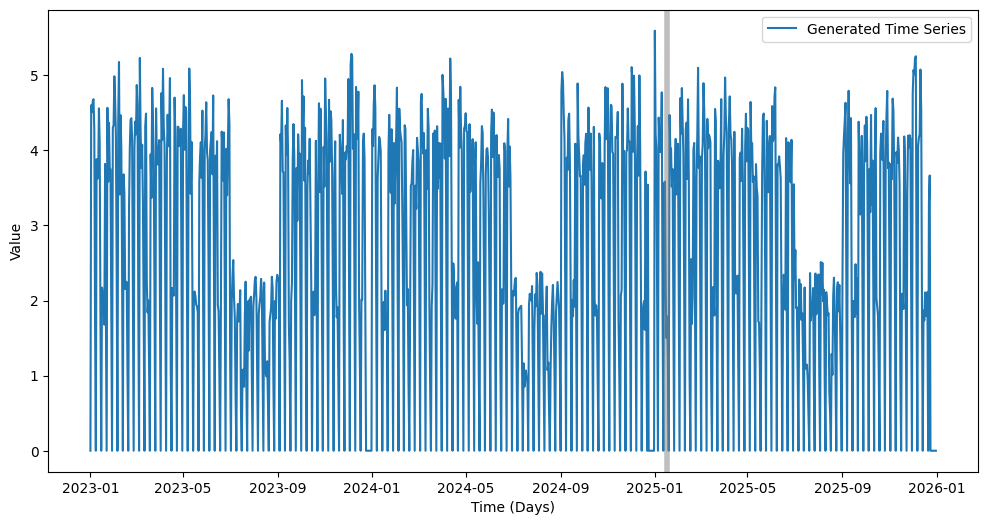

In [ ]:
conditions["true_weekly"] += f" ]"
conditions["true_monthly"] += f" ]"
conditions["true_yearly"] += f" ]"
plt.figure(figsize=(12, 6))
plt.plot(telemetry_data_generator.ts["ds"], telemetry_data_generator.ts["y"], label="Generated Time Series")
plt.axvline(x=pd.to_datetime(today), c='gray', lw=4, alpha=0.5)
plt.xlabel("Time (Days)")
plt.ylabel("Value")
plt.legend()
plt.show()

#### Linear Trend, 200 changepoints and all seasonalities (additive) enabled

Prophet Fit

In [ ]:
from prophet import Prophet

C:\Users\farac\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
max_days = days_between_dates(start_date, today)
df = create_prophet_dataframe(telemetry_data_generator.ts["y"], start_date=start_date)
fit_data =  df.iloc[:max_days]

run_name = "Initial Example"

with mlflow.start_run(run_name=run_name):


    # Define Prophet hyperparameters
    params = {
        "n_changepoints":200
    }

    # Initialize Prophet model and fit
    start = time.time()
    m = Prophet(**params)
    m.add_seasonality(name="monthly", period=30.5, fourier_order=5)

    # Fit the model on the dataset
    m.fit(fit_data)
    end = time.time()

    # Log training duration
    mlflow.log_metric("duration", end - start)

    # Log Hyperparameters
    params["trend"] = "linear"
    params["seasonality"] = "additive"
    params["weekly_seasonality"] = True
    params["monthly_seasonality"] = True
    params["yearly_seasonality"] = True
    mlflow.log_params(params)
    mlflow.log_params(conditions)

    # Predict the overall fit and the future
    future = m.make_future_dataframe(periods=num_units - max_days)
    forecast = m.predict(future)

    val_data =  df.iloc[max_days:].reset_index(drop=True)
    forecast2 = m.predict(val_data)

    # Log training metrics
    mlflow.log_metric("MAE_general", value=compute_mae(forecast["yhat"], df["y"]))
    mlflow.log_metric("RMSE_general", value=compute_rmse(forecast["yhat"], df["y"]))
    mlflow.log_metric("MAE_future", value=compute_mae(forecast2["yhat"], val_data["y"]))
    mlflow.log_metric("RMSE_future", value=compute_rmse(forecast2["yhat"], val_data["y"]))


2025-01-17 17:21:54,480 - cmdstanpy - DEBUG - cmd: where.exe tbb.dll
cwd: None
2025-01-17 17:21:54,570 - cmdstanpy - DEBUG - TBB already found in load path
2025-01-17 17:21:54,576 - prophet - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2025-01-17 17:21:54,594 - cmdstanpy - DEBUG - input tempfile: C:\Users\farac\AppData\Local\Temp\tmpdh0gfbwo\t1rbzt4z.json
2025-01-17 17:21:54,659 - cmdstanpy - DEBUG - input tempfile: C:\Users\farac\AppData\Local\Temp\tmpdh0gfbwo\3k1dtycp.json
2025-01-17 17:21:54,663 - cmdstanpy - DEBUG - idx 0
2025-01-17 17:21:54,664 - cmdstanpy - DEBUG - running CmdStan, num_threads: None
2025-01-17 17:21:54,664 - cmdstanpy - DEBUG - CmdStan args: ['C:\\Users\\farac\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=79506', 'data', 'file=C:\\Users\\farac\\AppData\\Local\\Temp\\tmpdh0gfbwo\\t1rbzt4z.json', 'init=C:\\Users\\farac\\AppData\\Local\\Temp

🏃 View run Initial Example at: http://127.0.0.1:5000/#/experiments/422088914466224855/runs/04f63a74bb0d4209a84fc4d8b4ce0155
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/422088914466224855


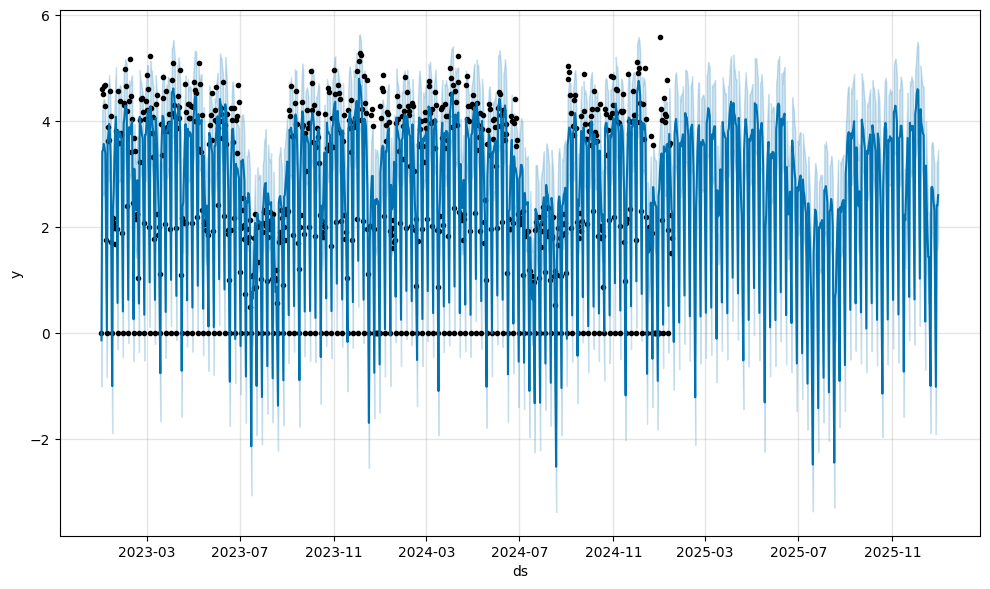

In [ ]:
fig = m.plot(forecast)

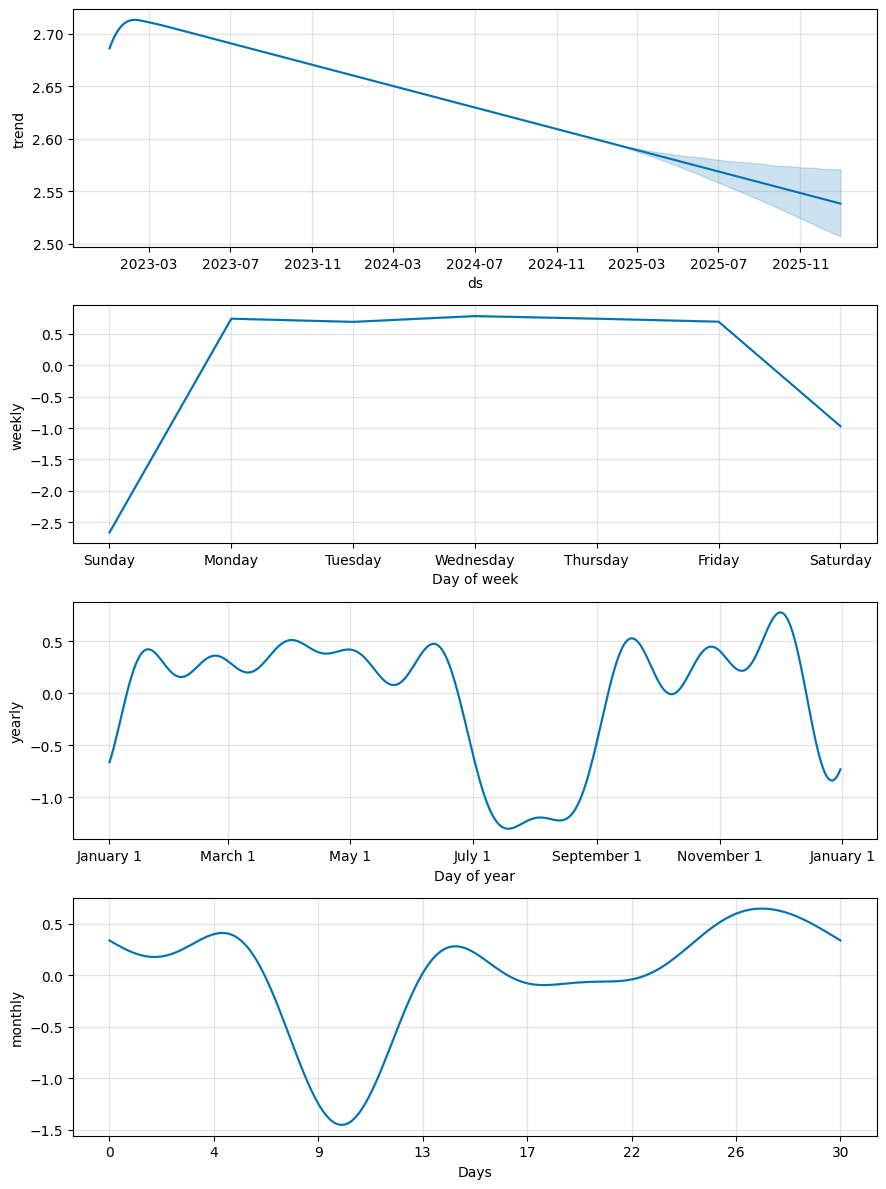

In [ ]:
fig2 = m.plot_components(forecast)

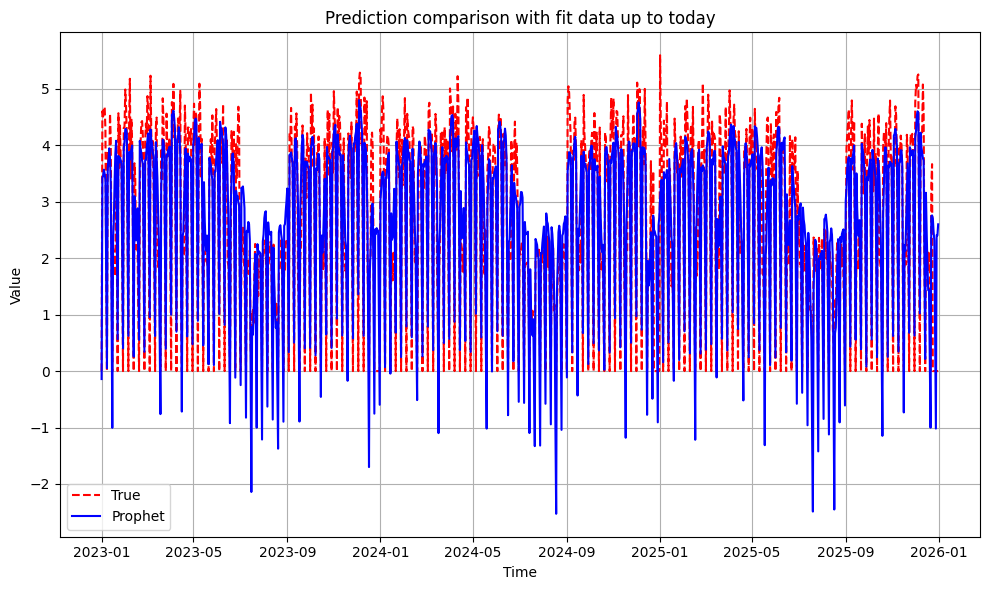

In [ ]:
# Get data
y_true = df['y']
y_prophet = forecast['yhat']

x = df['ds']
# Plot the component
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label="True", color="red", linestyle="--")
plt.plot(x, y_prophet, label="Prophet", color="blue")

# Customize the plot
plt.title(f"Prediction comparison with fit data up to today")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.tight_layout()

# Show or save the plot
plt.show()

#### Flat Trend and all seasonalities (additive) enabled

Prophet Fit

In [ ]:
from prophet import Prophet

In [ ]:
max_days = days_between_dates(start_date, today)
df = create_prophet_dataframe(telemetry_data_generator.ts["y"], start_date=start_date)
fit_data =  df.iloc[:max_days]

run_name = "Initial Example - 2"

with mlflow.start_run(run_name=run_name):


    # Define Prophet hyperparameters
    params = {
      "growth" : "flat"
    }

    # Initialize Prophet model and fit
    start = time.time()
    m = Prophet(**params)
    m.add_seasonality(name="monthly", period=30.5, fourier_order=5)

    # Fit the model on the dataset
    m.fit(fit_data)
    end = time.time()

    # Log training duration
    mlflow.log_metric("duration", end - start)

    # Log Hyperparameters
    params["trend"] = "flat"
    params["seasonality"] = "additive"
    params["weekly_seasonality"] = True
    params["monthly_seasonality"] = True
    params["yearly_seasonality"] = True
    mlflow.log_params(params)
    mlflow.log_params(conditions)

    # Predict the overall fit and the future
    future = m.make_future_dataframe(periods=num_units - max_days)
    forecast = m.predict(future)

    val_data =  df.iloc[max_days:].reset_index(drop=True)
    forecast2 = m.predict(val_data)

    # Log training metrics
    mlflow.log_metric("MAE_general", value=compute_mae(forecast["yhat"], df["y"]))
    mlflow.log_metric("RMSE_general", value=compute_rmse(forecast["yhat"], df["y"]))
    mlflow.log_metric("MAE_future", value=compute_mae(forecast2["yhat"], val_data["y"]))
    mlflow.log_metric("RMSE_future", value=compute_rmse(forecast2["yhat"], val_data["y"]))


2025-01-17 17:42:08,605 - cmdstanpy - DEBUG - cmd: where.exe tbb.dll
cwd: None
2025-01-17 17:42:08,692 - cmdstanpy - DEBUG - TBB already found in load path
2025-01-17 17:42:08,698 - prophet - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2025-01-17 17:42:08,711 - cmdstanpy - DEBUG - input tempfile: C:\Users\farac\AppData\Local\Temp\tmpdh0gfbwo\ui7hpeyu.json
2025-01-17 17:42:08,774 - cmdstanpy - DEBUG - input tempfile: C:\Users\farac\AppData\Local\Temp\tmpdh0gfbwo\mm0jvkjz.json
2025-01-17 17:42:08,776 - cmdstanpy - DEBUG - idx 0
2025-01-17 17:42:08,777 - cmdstanpy - DEBUG - running CmdStan, num_threads: None
2025-01-17 17:42:08,777 - cmdstanpy - DEBUG - CmdStan args: ['C:\\Users\\farac\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=42539', 'data', 'file=C:\\Users\\farac\\AppData\\Local\\Temp\\tmpdh0gfbwo\\ui7hpeyu.json', 'init=C:\\Users\\farac\\AppData\\Local\\Temp

🏃 View run Initial Example - 2 at: http://127.0.0.1:5000/#/experiments/422088914466224855/runs/5920de84135c42c6bad3b5ec9bd0bd98
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/422088914466224855


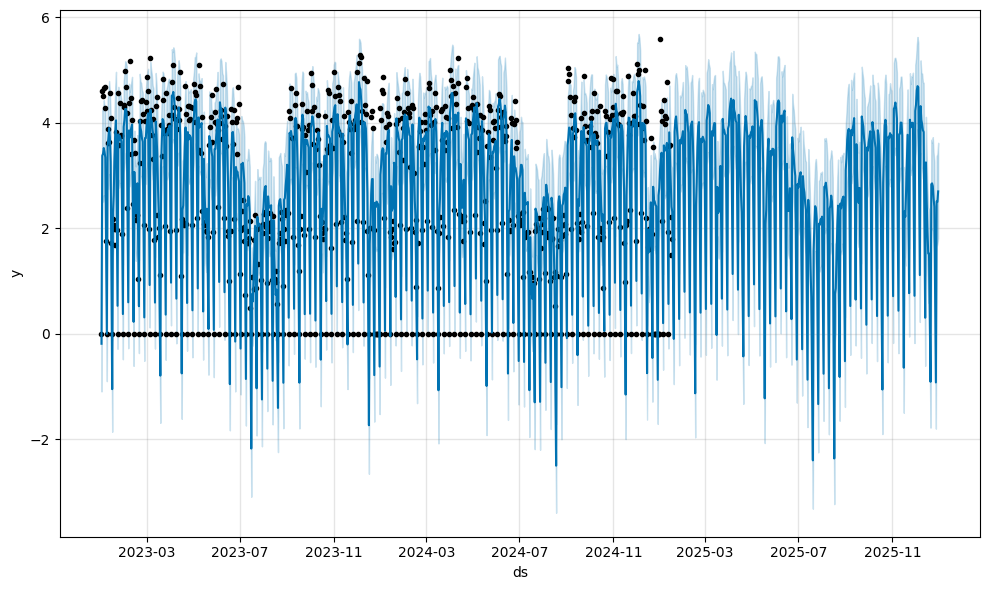

In [ ]:
fig = m.plot(forecast)

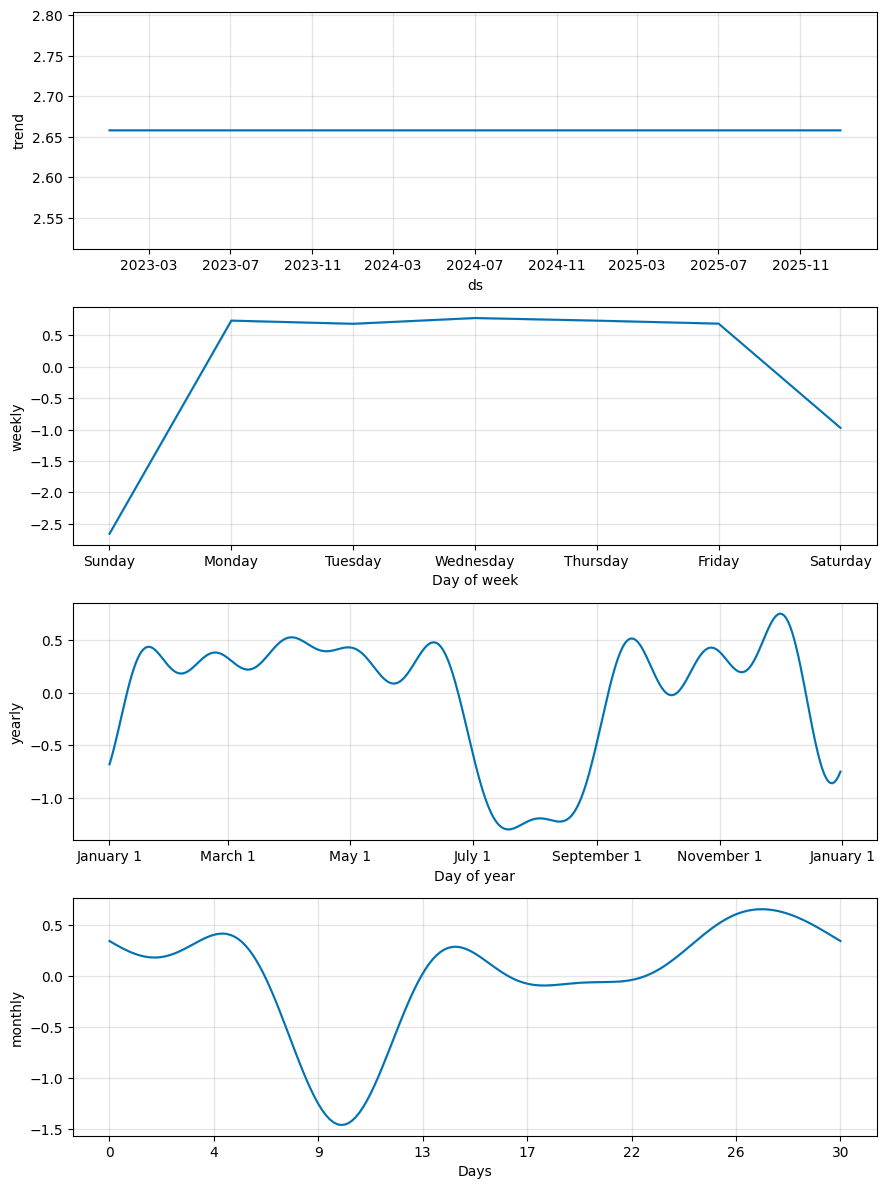

In [ ]:
fig2 = m.plot_components(forecast)

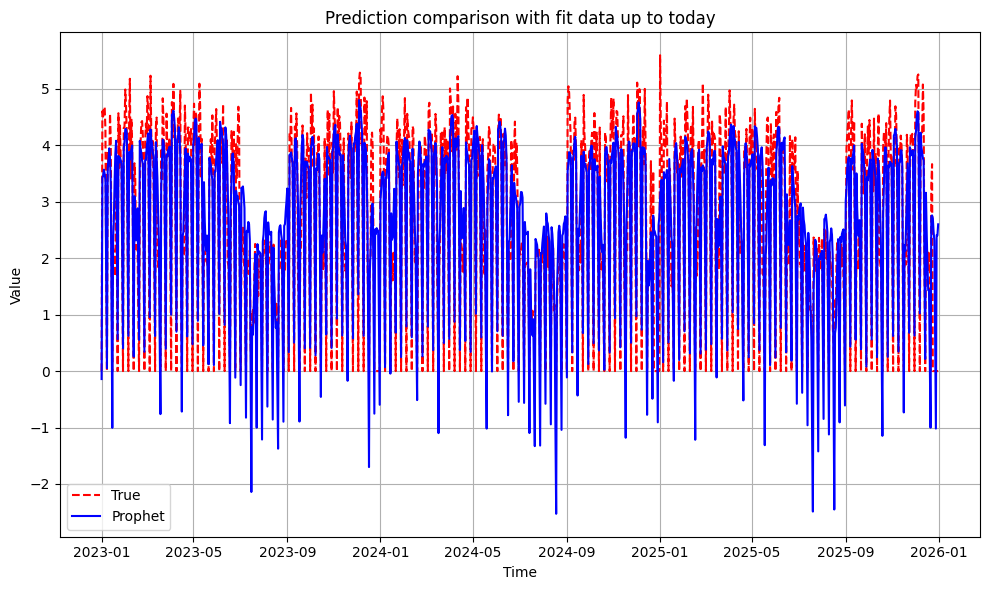

In [ ]:
# Get data
y_true = df['y']
y_prophet = forecast['yhat']

x = df['ds']
# Plot the component
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label="True", color="red", linestyle="--")
plt.plot(x, y_prophet, label="Prophet", color="blue")

# Customize the plot
plt.title(f"Prediction comparison with fit data up to today")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.tight_layout()

# Show or save the plot
plt.show()

#### Sigmoid Trend, 200 changepoints and all seasonalities (additive) enabled

Prophet Fit

In [ ]:
from prophet import Prophet

In [ ]:
max_days = days_between_dates(start_date, today)
df = create_prophet_dataframe(telemetry_data_generator.ts["y"], start_date=start_date)
df["cap"] = 24
df["floor"] = 0
fit_data =  df.iloc[:max_days]

run_name = "Initial Example - 3"

with mlflow.start_run(run_name=run_name):


    # Define Prophet hyperparameters
    params = {
      "growth" : "logistic",
      "n_changepoints": 200
    }

    # Initialize Prophet model and fit
    start = time.time()
    m = Prophet(**params)
    m.add_seasonality(name="monthly", period=30.5, fourier_order=5)

    # Fit the model on the dataset
    m.fit(fit_data)
    end = time.time()

    # Log training duration
    mlflow.log_metric("duration", end - start)

    # Log Hyperparameters
    params["trend"] = "logistic"
    params["seasonality"] = "additive"
    params["weekly_seasonality"] = True
    params["monthly_seasonality"] = True
    params["yearly_seasonality"] = True
    mlflow.log_params(params)
    mlflow.log_params(conditions)

    # Predict the overall fit and the future
    future = m.make_future_dataframe(periods=num_units - max_days)
    future["cap"] = 24
    future["floor"] = 0
    forecast = m.predict(future)

    val_data =  df.iloc[max_days:].reset_index(drop=True)
    forecast2 = m.predict(val_data)

    # Log training metrics
    mlflow.log_metric("MAE_general", value=compute_mae(forecast["yhat"], df["y"]))
    mlflow.log_metric("RMSE_general", value=compute_rmse(forecast["yhat"], df["y"]))
    mlflow.log_metric("MAE_future", value=compute_mae(forecast2["yhat"], val_data["y"]))
    mlflow.log_metric("RMSE_future", value=compute_rmse(forecast2["yhat"], val_data["y"]))


2025-01-17 17:53:03,519 - cmdstanpy - DEBUG - cmd: where.exe tbb.dll
cwd: None
2025-01-17 17:53:03,835 - cmdstanpy - DEBUG - TBB already found in load path
2025-01-17 17:53:03,861 - prophet - INFO - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
2025-01-17 17:53:03,900 - cmdstanpy - DEBUG - input tempfile: C:\Users\farac\AppData\Local\Temp\tmpdh0gfbwo\pgkvagh3.json
2025-01-17 17:53:04,056 - cmdstanpy - DEBUG - input tempfile: C:\Users\farac\AppData\Local\Temp\tmpdh0gfbwo\8d03pns4.json
2025-01-17 17:53:04,061 - cmdstanpy - DEBUG - idx 0
2025-01-17 17:53:04,063 - cmdstanpy - DEBUG - running CmdStan, num_threads: None
2025-01-17 17:53:04,064 - cmdstanpy - DEBUG - CmdStan args: ['C:\\Users\\farac\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=29696', 'data', 'file=C:\\Users\\farac\\AppData\\Local\\Temp\\tmpdh0gfbwo\\pgkvagh3.json', 'init=C:\\Users\\farac\\AppData\\Local\\Temp

🏃 View run Initial Example - 3 at: http://127.0.0.1:5000/#/experiments/422088914466224855/runs/78b4285393da49fcb17f365cec9281f0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/422088914466224855


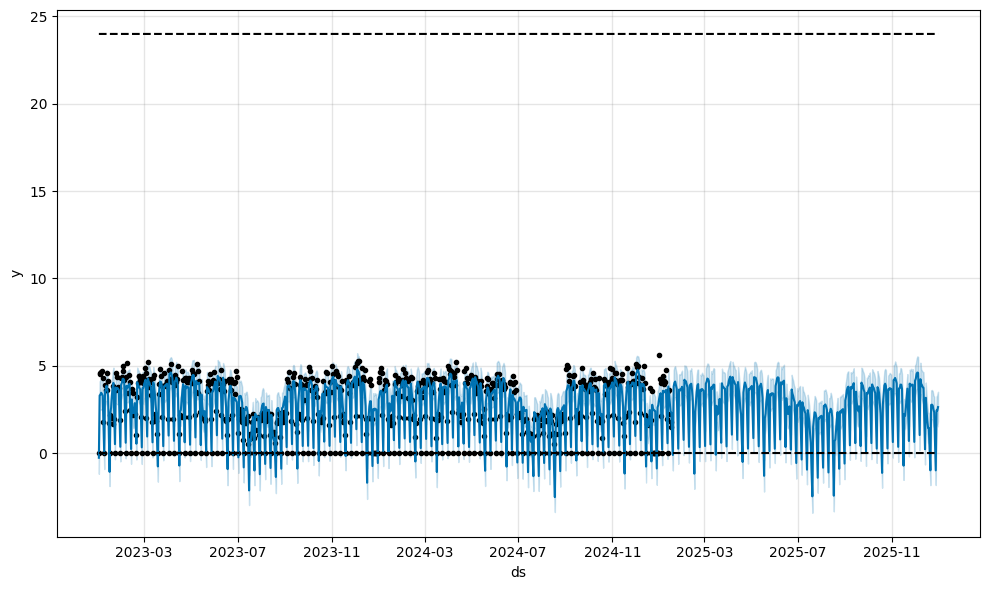

In [ ]:
fig = m.plot(forecast)

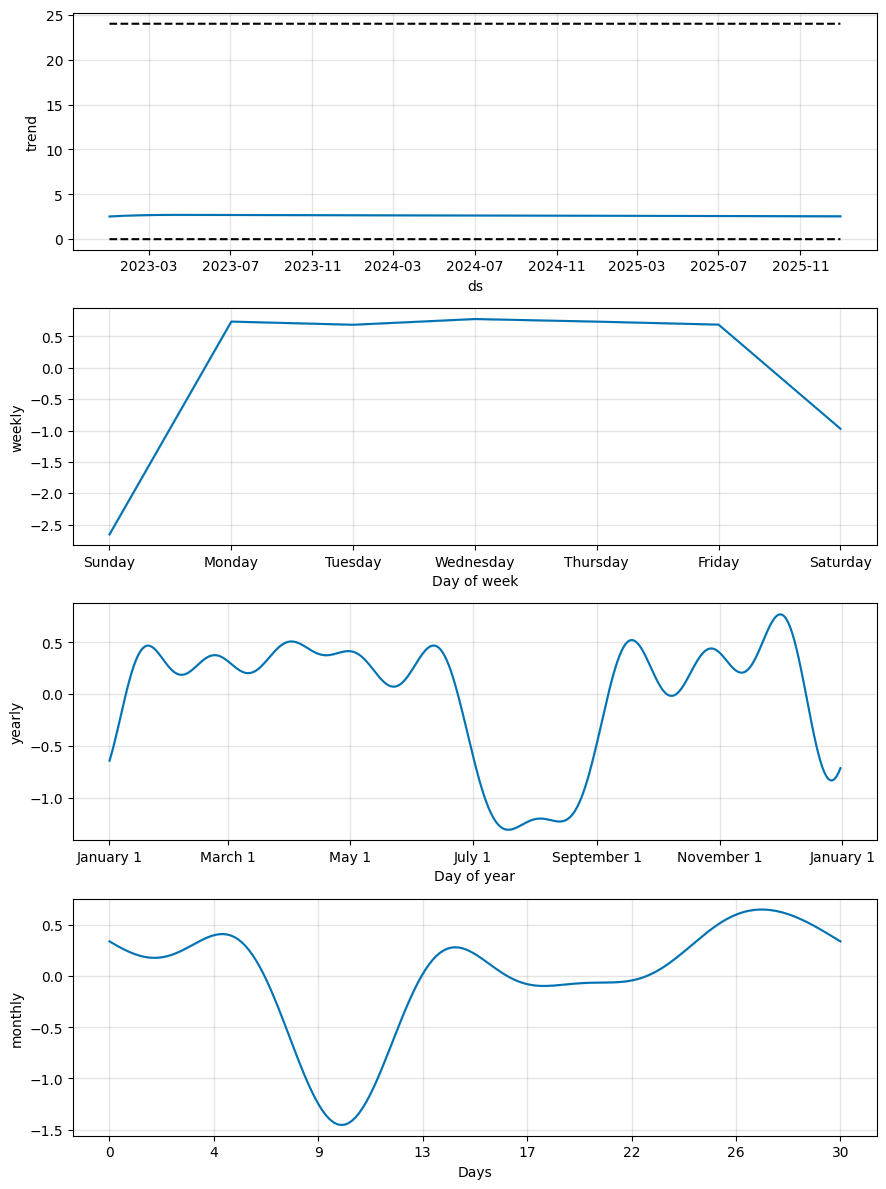

In [ ]:
fig2 = m.plot_components(forecast)

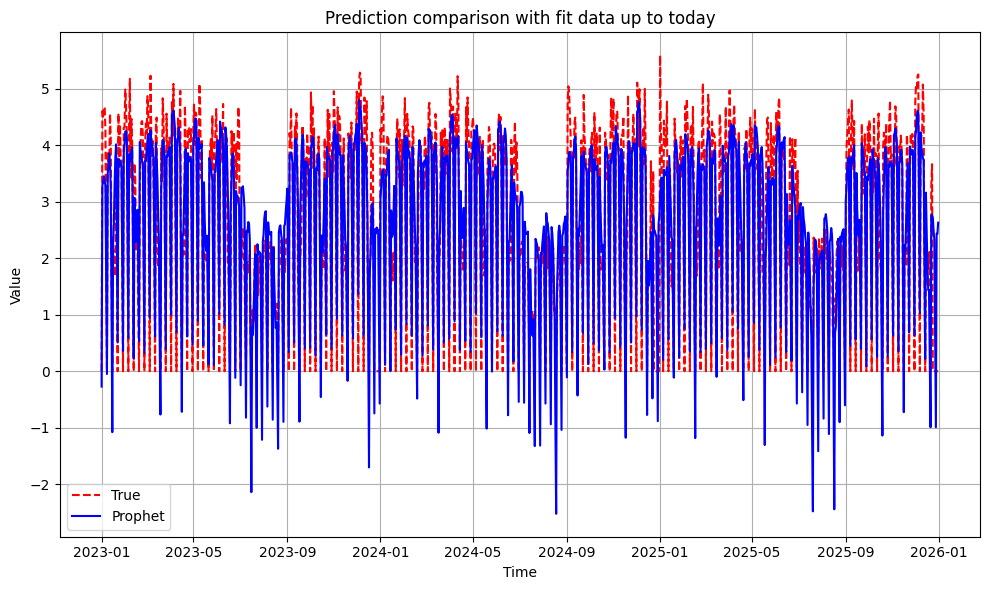

In [ ]:
# Get data
y_true = df['y']
y_prophet = forecast['yhat']

x = df['ds']
# Plot the component
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label="True", color="red", linestyle="--")
plt.plot(x, y_prophet, label="Prophet", color="blue")

# Customize the plot
plt.title(f"Prediction comparison with fit data up to today")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.tight_layout()

# Show or save the plot
plt.show()

####TODO add all seasonalities (28,29,30,31)

##Seasonality changepoints (Prophet)

In [ ]:
def is_first_segment(ds):
    date = pd.to_datetime(ds)
    return date.year == 2025 and (date.month > 4 and date.month < 10)

def is_second_segment(ds):
    date = pd.to_datetime(ds)
    return date.year == 2026 and date.month < 8

def is_third_segment(ds):
    date = pd.to_datetime(ds)
    return date.year == 2027 and date.month < 4

df['first_segment'] = df['ds'].apply(is_first_segment)
df['second_segment'] = df['ds'].apply(is_second_segment)
df['third_segment'] = df['ds'].apply(is_third_segment)
max_days = 900
fit_data =  df.iloc[:max_days]
m = Prophet(n_changepoints=200)
m.add_seasonality(name='weekly_first_segment', period=7, fourier_order=3, condition_name='first_segment')
m.add_seasonality(name='weekly_second_segment', period=7, fourier_order=3, condition_name='second_segment')
m.add_seasonality(name='weekly_third_segment', period=7, fourier_order=3, condition_name='third_segment')

m.fit(fit_data)

future = m.make_future_dataframe(periods=num_units - max_days)
future['first_segment'] = future['ds'].apply(is_first_segment)
future['second_segment'] = future['ds'].apply(is_second_segment)
future['third_segment'] = future['ds'].apply(is_third_segment)